# Gaussian Mixture Models

### Loading Libraries

In [1]:
# Numerical Computing
import numpy as np
from numpy import atleast_2d

# Data Manipulation
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


# Warnings
import warnings

# Scikit-Learn
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_mutual_info_score

In [2]:
sns.set_style('white')

warnings.filterwarnings('ignore')

In [27]:
cmap = plt.get_cmap('crest')

### Loading Iris Data

In [12]:
iris = load_iris()

iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

### Creating DataFrame

In [13]:
features = iris.feature_names

data = pd.DataFrame(data=np.column_stack([iris.data, iris.target]), 
                    columns=features + ['label'])

data.label = data.label.astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   label              150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


#### Standardize Data

In [14]:
# Scaler Model
scaler = StandardScaler()

# Fitting Scaler
features_standardized = scaler.fit_transform(data[features])
n = len(data)

#### Reducing Dimensionality to Visualize Clusters

In [15]:
pca = PCA(n_components=2)

features_2D = pca.fit_transform(features_standardized)

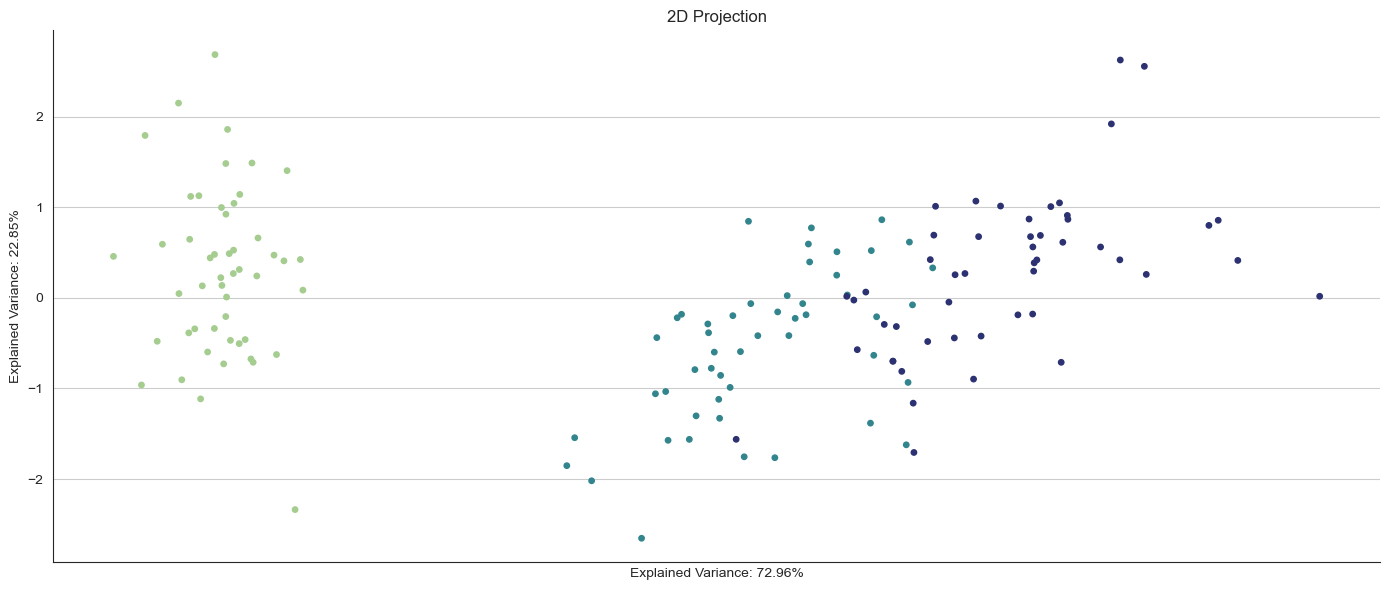

In [28]:
ev1, ev2 = pca.explained_variance_ratio_


fig = plt.figure(figsize=(14, 6))

ax = fig.gca()
ax.set_title('2D Projection')
ax.set_xlabel(f'Explained Variance: {ev1:.2%}')
ax.set_ylabel(f'Explained Variance: {ev2:.2%}')

ax.scatter(*features_2D.T, c=data.label, s=15, cmap=cmap)
ax.set_xticklabels([])
ax.set_xticks([])
sns.despine()
plt.tight_layout();
plt.grid(True)
plt.show()

### Performing GMM Clustering

In [29]:
n_components = 3

gmm = GaussianMixture(n_components=n_components)
gmm.fit(features_standardized)

GaussianMixture(n_components=3)

In [30]:
data['clusters'] = gmm.predict(features_standardized)

labels, clusters = data.label, data.clusters
mi = adjusted_mutual_info_score(labels, clusters)

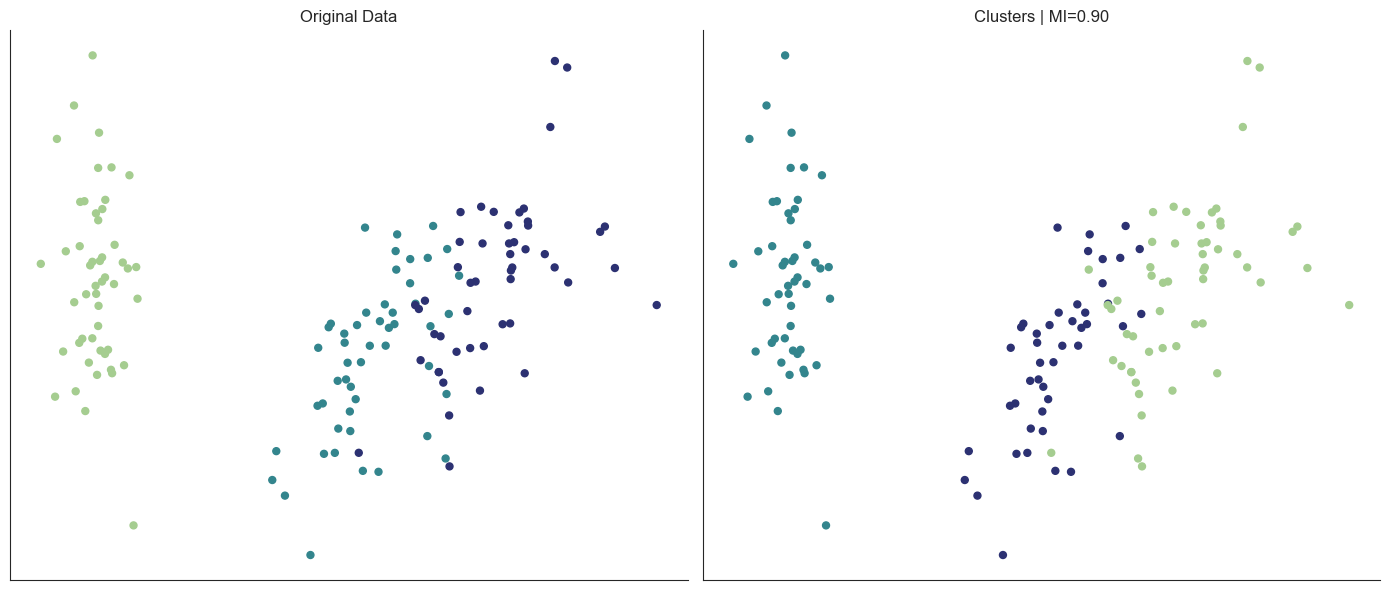

In [35]:
fig, axes = plt.subplots(ncols=2, figsize=(14, 6))

axes[0].scatter(*features_2D.T, c=data.label, s=25, cmap=cmap)
axes[0].set_title('Original Data')
axes[1].scatter(*features_2D.T, c=data.clusters, s=25, cmap=cmap)
axes[1].set_title('Clusters | MI={:.2f}'.format(mi))

for ax in axes:
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

sns.despine()
fig.tight_layout()
# plt.grid(True)
plt.show()

### Visualizing Gaussian Distributions

In [36]:
xmin, ymin = features_2D.min(axis=0)
xmax, ymax = features_2D.max(axis=0)

x = np.linspace(xmin, xmax, 500)
y = np.linspace(ymin, ymax, 500)
X, Y = np.meshgrid(x, y)

simulated_2D = np.column_stack([np.ravel(X), np.ravel(Y)])
simulated_4D = pca.inverse_transform(simulated_2D)
Z = atleast_2d(np.clip(np.exp(gmm.score_samples(simulated_4D)), a_min=0, a_max=1)).reshape(X.shape)

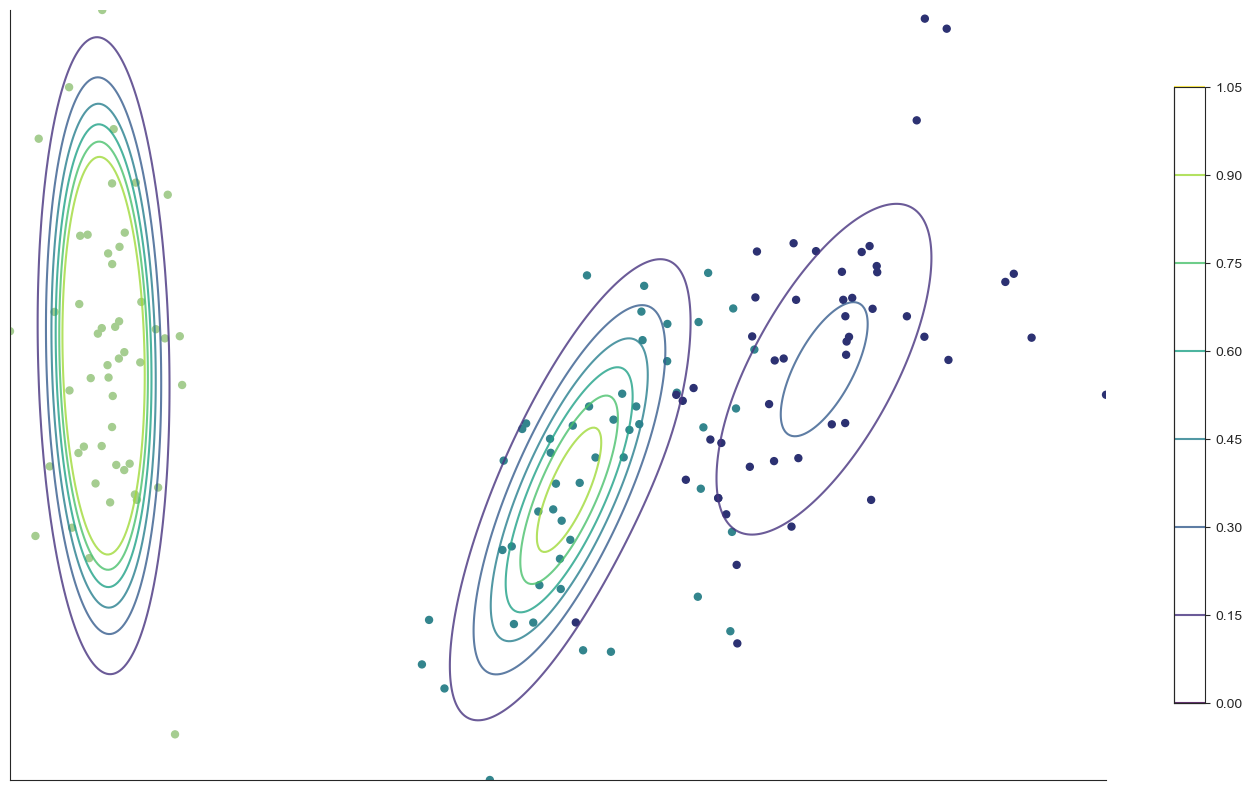

In [38]:
fig, ax = plt.subplots(figsize=(14, 8))

CS = ax.contour(X, Y, Z,
                cmap='viridis',
                alpha=.8)
CB = plt.colorbar(CS, shrink=0.8)
ax.scatter(*features_2D.T, c=data.label, s=25, cmap=cmap)

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
sns.despine()
fig.tight_layout()

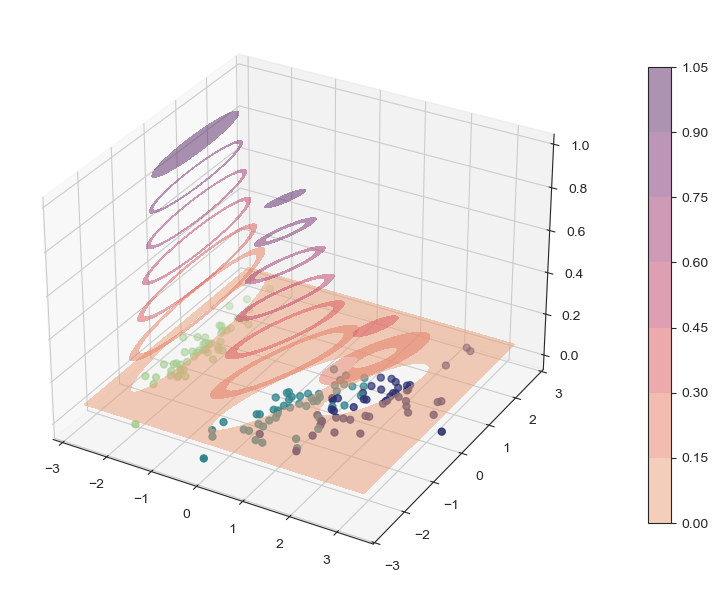

In [41]:
# fig = plt.figure(figsize=(14, 6))
# ax = fig.gca(projection='3d')

fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(111, projection='3d')  

CS = ax.contourf3D(X, Y, Z, cmap='flare', alpha=.5)
CB = plt.colorbar(CS, shrink=0.8)

ax.scatter(*features_2D.T, c=data.label, s=25, cmap=cmap)
fig.tight_layout()
plt.show()